In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
pd.set_option('display.max_columns',None)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df = df.drop('customerID',axis=1)
df = df.drop('InternetService',axis=1)

In [6]:
count=0
for i in df.TotalCharges:
    if i==' ':
        count+=1
print('count of empty string:- ',count)
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

count of empty string:-  11


In [7]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [9]:
num = list(df.select_dtypes(include=['int64','float64']).keys())
cat = list(df.select_dtypes(include='O').keys())
print(cat)
print(num)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [10]:
for i in cat:
    print(df[i].value_counts())
df.MultipleLines = df.MultipleLines.replace('No phone service','No')
df.OnlineSecurity = df.OnlineSecurity.replace('No internet service','No')
df.OnlineBackup = df.OnlineBackup.replace('No internet service','No')
df.DeviceProtection = df.DeviceProtection.replace('No internet service','No')
df.TechSupport = df.TechSupport.replace('No internet service','No')
df.StreamingTV = df.StreamingTV.replace('No internet service','No')
df.StreamingMovies = df.StreamingMovies.replace('No internet service','No')

Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
No                     2785
Yes                    2732
No internet service    15

In [11]:
for i in cat:
    df[i] = df[i].replace('Yes',1)
    df[i] = df[i].replace('No',0)

In [12]:
df.gender = df.gender.replace('Male',1)
df.gender = df.gender.replace('Female',0)

In [13]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Contract'] = label.fit_transform(df['Contract'])
df['PaymentMethod'] = label.fit_transform(df['PaymentMethod'])

In [14]:
scale_cols = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df[scale_cols] = scale.fit_transform(df[scale_cols])

In [15]:
x = df.drop('Churn',axis=1)
y = df['Churn']

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)
print(xtrain.shape)
print(xtest.shape)

(5634, 18)
(1409, 18)


In [17]:
import tensorflow as tf
from tensorflow import keras

In [18]:
model = keras.Sequential([
    keras.layers.Dense(18, input_shape=(18,), activation='relu'),
    keras.layers.Dense(14, activation='relu'),
    keras.layers.Dense(9,activation = 'relu'),
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [19]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.fit(xtrain,ytrain,epochs=20)

Epoch 1/20
177/177 [==============================] - 2s 4ms/step - loss: 0.5405 - accuracy: 0.7352
Epoch 2/20
177/177 [==============================] - 1s 3ms/step - loss: 0.4582 - accuracy: 0.7723
Epoch 3/20
177/177 [==============================] - 1s 3ms/step - loss: 0.4442 - accuracy: 0.7788
Epoch 4/20
177/177 [==============================] - 1s 5ms/step - loss: 0.4412 - accuracy: 0.7806
Epoch 5/20
177/177 [==============================] - 1s 6ms/step - loss: 0.4348 - accuracy: 0.7838
Epoch 6/20
177/177 [==============================] - 1s 6ms/step - loss: 0.4314 - accuracy: 0.7920
Epoch 7/20
177/177 [==============================] - 1s 7ms/step - loss: 0.4288 - accuracy: 0.7929
Epoch 8/20
177/177 [==============================] - 1s 6ms/step - loss: 0.4258 - accuracy: 0.7962
Epoch 9/20
177/177 [==============================] - 1s 5ms/step - loss: 0.4224 - accuracy: 0.7971
Epoch 10/20
177/177 [==============================] - 1s 7ms/step - loss: 0.4210 - accuracy: 0.7993

In [20]:
model.evaluate(xtest,ytest)

45/45 [==============================] - 1s 4ms/step - loss: 0.4073 - accuracy: 0.8091


[0.40727195143699646, 0.8090844750404358]

In [21]:
ypred = model.predict(xtest)
print(ypred)
ypred_lis = []
for i in ypred:
    if i>0.5:
        ypred_lis.append(1)
    else:
        ypred_lis.append(0)
print(ypred_lis)

45/45 [==============================] - 0s 2ms/step
[[0.30912858]
 [0.6853036 ]
 [0.17010346]
 ...
 [0.15868142]
 [0.09231018]
 [0.84560287]]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1066
           1       0.63      0.52      0.57       343

    accuracy                           0.81      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.80      0.81      0.80      1409



Text(132.0, 0.5, 'True_number')

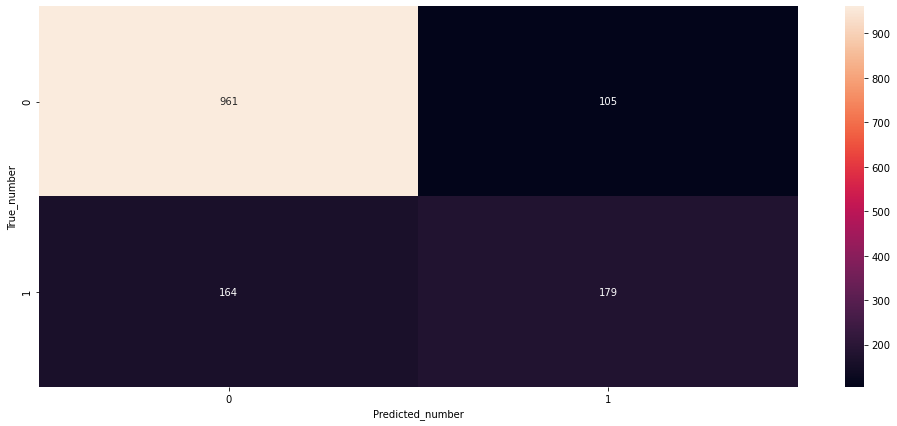

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(ytest,ypred_lis))
conf_mat = tf.math.confusion_matrix(labels=ytest,predictions=ypred_lis)
plt.figure(figsize = (17,7))
sb.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')